In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import *

In [2]:
img = cv2.imread('./images/images/dark_image.png', 0)


In [3]:
img2 = cv2.imread("./images/images/bright_image.png", 0)

In [4]:
def cv2_show_image(img):
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
def plt_show_image(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
def edge_operator_meth(img, k):
    f = img.copy().astype(np.float16)
    out = np.zeros_like(img, dtype = 'float16')
    mask_gx = np.array([[-1, 0, 1], [-k, 0, k], [-1, 0, 1]] , dtype = 'float16') 
    mask_gy = np.array([[-1, -k, -1], [0, 0, 0], [1, k, 1]] , dtype = 'float16') 
 
    sz, sz = mask_gx.shape
    bd = sz // 2
    (m,n) = f.shape
    for i in range(bd,m-bd):
        for j in range(bd,n-bd):
            gx, gy = 0., 0.
            sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
            gx = np.multiply(sub_f, mask_gx).sum() 
            gy = np.multiply(sub_f, mask_gy).sum()    
            out[i,j] = np.sqrt(gx**2 + gy**2)
    out[out>255.0] = 255.0
    return out.astype(np.uint8)

# 2.1

In [7]:
img_edge_prewitt = edge_operator_meth(img, 1)


C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)


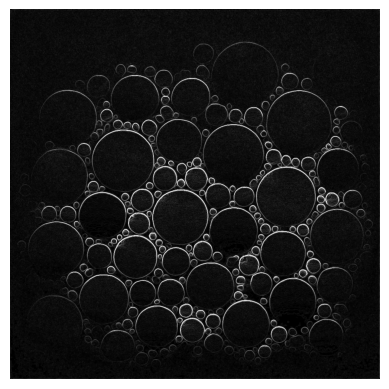

In [8]:
plt_show_image(img_edge_prewitt)

In [9]:
img_edge_sobel = edge_operator_meth(img, 2)

C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)


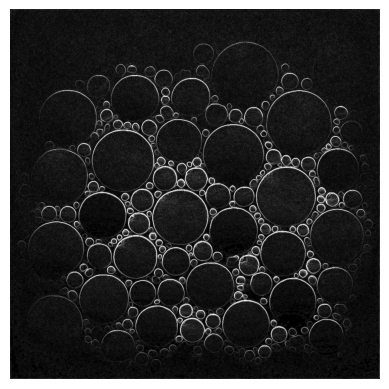

In [10]:
plt_show_image(img_edge_sobel)

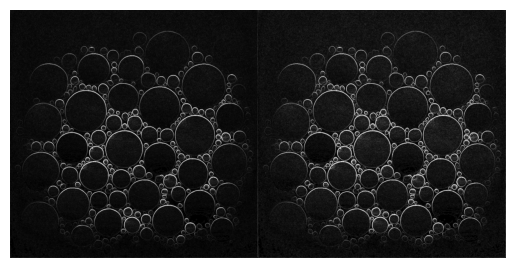

In [11]:
muls = cv2.hconcat([img_edge_prewitt, img_edge_sobel])
plt_show_image(muls)

# 2.2

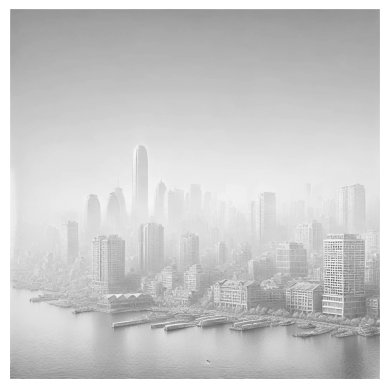

In [12]:
plt_show_image(img2)

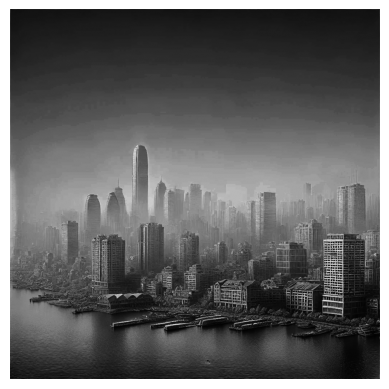

In [13]:
img2_gamma = power_gamma(img2, 5)
plt_show_image(img2_gamma)

In [14]:
img2_edge_prewitt = edge_operator_meth(img2_gamma,1)

C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)


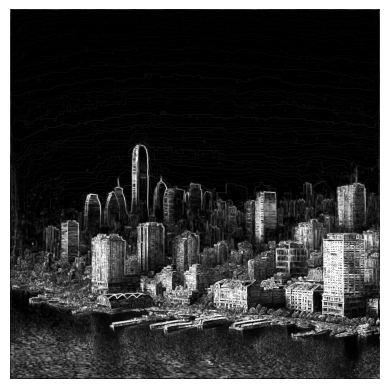

In [15]:
plt_show_image(img2_edge_prewitt)

In [16]:
img2_edge_sobel = edge_operator_meth(img2_gamma, 2)

C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\champ\AppData\Local\Temp\ipykernel_12508\2882460644.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)


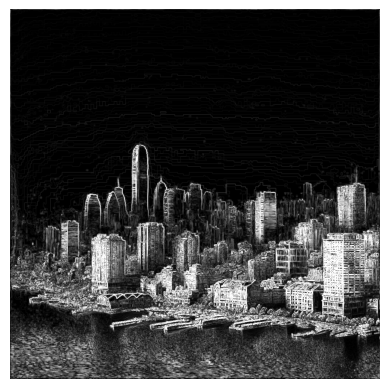

In [17]:
plt_show_image(img2_edge_sobel)